# Using Scrapy to Scrape for Basketball Statistics

In [61]:
import requests
from bs4 import BeautifulSoup
from urllib.request import urlopen
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [62]:
#Establish site for scraping
url = 'http://www.espn.com/nba/statistics/player/_/stat/scoring'
html = urlopen(url)

In [63]:
#Parse our html
soup = BeautifulSoup(html, 'lxml')
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [64]:
trows = soup.find_all('tr')
print(trows[:5])

[<tr align="right" class="colhead"><td align="left" style="width:20px;">RK</td><td align="left">PLAYER</td><td align="left">TEAM</td><td><a href="//www.espn.com/nba/statistics/player/_/stat/scoring/sort/gamesPlayed" title="Games Played">GP</a></td><td><a href="//www.espn.com/nba/statistics/player/_/stat/scoring/sort/avgMinutes" title="Minutes Per Game">MPG</a></td><td><a href="//www.espn.com/nba/statistics/player/_/stat/scoring/sort/points/order/false" title="Points">PTS</a></td><td><span title="Field Goals Made-Attempted">FGM-FGA</span></td><td><a href="//www.espn.com/nba/statistics/player/_/stat/scoring/sort/fieldGoalPct" title="Field Goal Percentage">FG%</a></td><td><span title="3-Point Field Goals Made-Attempted">3PM-3PA</span></td><td><a href="//www.espn.com/nba/statistics/player/_/stat/scoring/sort/threePointFieldGoalPct" title="3-Point Field Goal Percentage">3P%</a></td><td><span title="Free Throws Made-Attempted">FTM-FTA</span></td><td><a href="//www.espn.com/nba/statistics/pla

In [65]:
#Print out each cell of each table row

for trow in trows:
    trow_td = trow.find_all('td')
print(trow_td)
type(trow_td)

[<td align="left">40</td>, <td align="left"><a href="http://www.espn.com/nba/player/_/id/1975/carmelo-anthony">Carmelo Anthony</a>, PF</td>, <td align="left">OKC</td>, <td>78</td>, <td>32.1</td>, <td class="sortcell">1261</td>, <td>472-1168</td>, <td>.404</td>, <td>169-474</td>, <td>.357</td>, <td>148-193</td>, <td>.767</td>]


bs4.element.ResultSet

In [66]:
#Get text from each tr and td
list_trows = []

for trow in trows:
    cells = trow.find_all('td')
    str_cells = str(cells)
    cleantext = BeautifulSoup(str_cells, "lxml").get_text()
    list_trows.append(cleantext)
print(list_trows)

['[RK, PLAYER, TEAM, GP, MPG, PTS, FGM-FGA, FG%, 3PM-3PA, 3P%, FTM-FTA, FT%]', '[1, LeBron James, SF, CLE, 82, 36.9, 2251, 857-1580, .542, 149-406, .367, 388-531, .731]', '[2, James Harden, PG, HOU, 72, 35.4, 2191, 651-1449, .449, 265-722, .367, 624-727, .858]', '[3, Anthony Davis, PF, NO, 75, 36.4, 2110, 780-1462, .534, 55-162, .340, 495-598, .828]', '[4, Russell Westbrook, PG, OKC, 80, 36.4, 2028, 757-1687, .449, 97-326, .298, 417-566, .737]', '[5, Giannis Antetokounmpo, PF, MIL, 75, 36.7, 2014, 742-1402, .529, 43-140, .307, 487-641, .760]', '[6, Damian Lillard, PG, POR, 73, 36.6, 1962, 621-1415, .439, 227-629, .361, 493-538, .916]', '[7, Bradley Beal, SG, WSH, 82, 36.3, 1857, 683-1484, .460, 199-530, .375, 292-369, .791]', '[8, DeMar DeRozan, SG, TOR, 80, 33.9, 1840, 645-1413, .456, 89-287, .310, 461-559, .825]', '[9, Kevin Durant, SF, GS, 68, 34.2, 1792, 630-1222, .516, 173-413, .419, 359-404, .889]', '[10, Lou Williams, SG, LAC, 79, 32.8, 1782, 582-1337, .435, 186-518, .359, 432-4

In [67]:
#Create dataframe from output

stats = pd.DataFrame(list_trows)
stats.head(10)

,0
0,"[RK, PLAYER, TEAM, GP, MPG, PTS, FGM-FGA, FG%,..."
1,"[1, LeBron James, SF, CLE, 82, 36.9, 2251, 857..."
2,"[2, James Harden, PG, HOU, 72, 35.4, 2191, 651..."
3,"[3, Anthony Davis, PF, NO, 75, 36.4, 2110, 780..."
4,"[4, Russell Westbrook, PG, OKC, 80, 36.4, 2028..."
5,"[5, Giannis Antetokounmpo, PF, MIL, 75, 36.7, ..."
6,"[6, Damian Lillard, PG, POR, 73, 36.6, 1962, 6..."
7,"[7, Bradley Beal, SG, WSH, 82, 36.3, 1857, 683..."
8,"[8, DeMar DeRozan, SG, TOR, 80, 33.9, 1840, 64..."
9,"[9, Kevin Durant, SF, GS, 68, 34.2, 1792, 630-..."


In [68]:
#Because all our data is in the [0] position, split on ',' 

stats = stats[0].str.split(',', expand=True)
stats.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,[RK,PLAYER,TEAM,GP,MPG,PTS,FGM-FGA,FG%,3PM-3PA,3P%,FTM-FTA,FT%],None
1,[1,LeBron James,SF,CLE,82,36.9,2251,857-1580,.542,149-406,.367,388-531,.731]
2,[2,James Harden,PG,HOU,72,35.4,2191,651-1449,.449,265-722,.367,624-727,.858]
3,[3,Anthony Davis,PF,NO,75,36.4,2110,780-1462,.534,55-162,.340,495-598,.828]
4,[4,Russell Westbrook,PG,OKC,80,36.4,2028,757-1687,.449,97-326,.298,417-566,.737]
5,[5,Giannis Antetokounmpo,PF,MIL,75,36.7,2014,742-1402,.529,43-140,.307,487-641,.760]
6,[6,Damian Lillard,PG,POR,73,36.6,1962,621-1415,.439,227-629,.361,493-538,.916]
7,[7,Bradley Beal,SG,WSH,82,36.3,1857,683-1484,.460,199-530,.375,292-369,.791]
8,[8,DeMar DeRozan,SG,TOR,80,33.9,1840,645-1413,.456,89-287,.310,461-559,.825]
9,[9,Kevin Durant,SF,GS,68,34.2,1792,630-1222,.516,173-413,.419,359-404,.889]


In [69]:
#Remove square brackets from first column

stats[0] = stats[0].str.strip('[')
stats.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,RK,PLAYER,TEAM,GP,MPG,PTS,FGM-FGA,FG%,3PM-3PA,3P%,FTM-FTA,FT%],None
1,1,LeBron James,SF,CLE,82,36.9,2251,857-1580,.542,149-406,.367,388-531,.731]
2,2,James Harden,PG,HOU,72,35.4,2191,651-1449,.449,265-722,.367,624-727,.858]
3,3,Anthony Davis,PF,NO,75,36.4,2110,780-1462,.534,55-162,.340,495-598,.828]
4,4,Russell Westbrook,PG,OKC,80,36.4,2028,757-1687,.449,97-326,.298,417-566,.737]


In [71]:
#Remove square brackets from last column
stats.iloc[:,-1] = stats.iloc[:,-1].str.strip(']')
stats.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,RK,PLAYER,TEAM,GP,MPG,PTS,FGM-FGA,FG%,3PM-3PA,3P%,FTM-FTA,FT%],None
1,1,LeBron James,SF,CLE,82,36.9,2251,857-1580,.542,149-406,.367,388-531,.731
2,2,James Harden,PG,HOU,72,35.4,2191,651-1449,.449,265-722,.367,624-727,.858
3,3,Anthony Davis,PF,NO,75,36.4,2110,780-1462,.534,55-162,.340,495-598,.828
4,4,Russell Westbrook,PG,OKC,80,36.4,2028,757-1687,.449,97-326,.298,417-566,.737


In [74]:
#Make first row the table headers
stats = stats.rename(columns=stats.iloc[0]).drop(stats.index[0])
stats.head(5)

,RK,PLAYER,TEAM,GP,MPG,PTS,FGM-FGA,FG%,3PM-3PA,3P%,FTM-FTA,FT%],None
1,1,LeBron James,SF,CLE,82,36.9,2251,857-1580,.542,149-406,.367,388-531,.731
2,2,James Harden,PG,HOU,72,35.4,2191,651-1449,.449,265-722,.367,624-727,.858
3,3,Anthony Davis,PF,NO,75,36.4,2110,780-1462,.534,55-162,.340,495-598,.828
4,4,Russell Westbrook,PG,OKC,80,36.4,2028,757-1687,.449,97-326,.298,417-566,.737
5,5,Giannis Antetokounmpo,PF,MIL,75,36.7,2014,742-1402,.529,43-140,.307,487-641,.760


In [76]:
#Rename table headers as we accidentally parsed position into the team column
stats.columns = stats.columns = ['RK', 'PLAYER','POSITION', 'TEAM', 'GP', 'MPG', 'PTS', 'FGM-FGA', 'FG%', '3PM-3PA', '3P%', 'FTM-FTA', 'FT%']

In [87]:
#Remove header repeats
stats = stats.drop(stats.index[[10,21,32]])

In [88]:
stats['GP'] = stats['GP'].astype('float')
stats['MPG'] = stats['MPG'].astype('float')
stats['PTS'] = stats['PTS'].astype('float')
stats['FG%'] = stats['FG%'].astype('float')
stats['3P%'] = stats['3P%'].astype('float')
stats['FT%'] = stats['FT%'].astype('float')

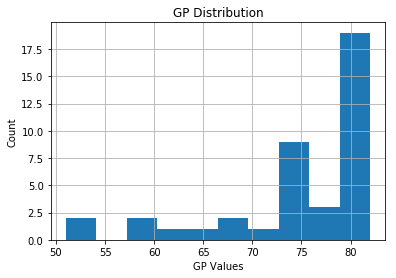

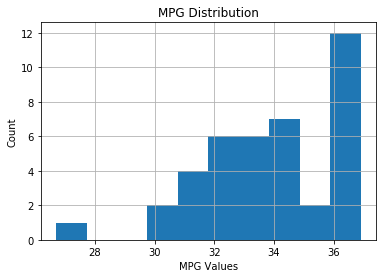

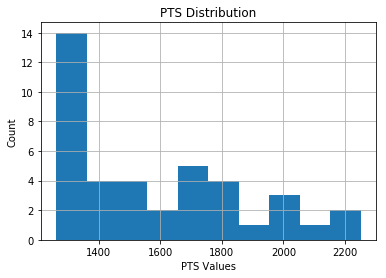

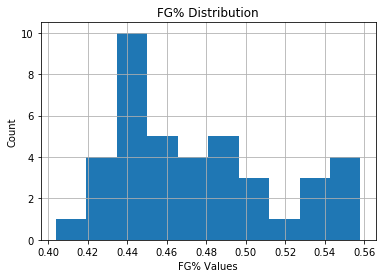

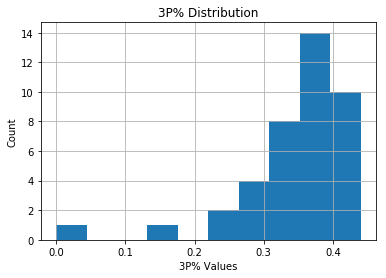

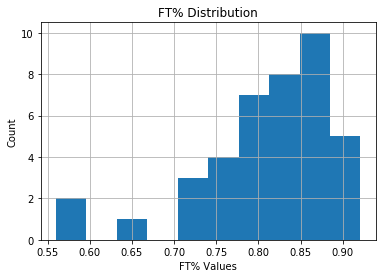

In [89]:
# Plot histograms for all continuous data
for col in stats.dtypes[stats.dtypes == 'float64'].index:
    stats[col].hist()
    plt.title(col + " Distribution")
    plt.xlabel(col + " Values")
    plt.ylabel("Count")
    plt.show()